# The Vanishing/Exploding Gradients Problems

Thuật toán lan truyền ngược (backpropagation) thực hiện bằng cách bắt đầu từ output đến input layer, lan truyền gradient lỗi trên đường đi. Khi tính toán đạo hàm hàm mất mát liên quan đến từng tham số trong mạng, nó dùng đạo hàm để cập nhật các tham số bằng cách giảm gradient.

Thật không may, độ dốc (gradient) thường ngày càng nhỏ dần khi thuật toán lan truyền ngược xuống các lớp thấp hơn. Kết quả là, việc cập nhật bằng phương pháp gradient descent gần như không làm thay đổi trọng số kết nối của các lớp thấp, và quá trình huấn luyện không bao giờ hội tụ đến một nghiệm tốt. Hiện tượng này được gọi là vấn đề gradient biến mất (vanishing gradients).

Trong một số trường hợp, điều ngược lại có thể xảy ra: gradient có thể ngày càng lớn hơn cho đến khi các lớp nhận được những cập nhật trọng số cực kỳ lớn và thuật toán bị phân kỳ. Đây được gọi là vấn đề gradient bùng nổ (exploding gradients), thường xuất hiện nhất trong các mạng nơ-ron hồi tiếp (recurrent neural networks – xem thêm ở Chương 15).

Nói chung, các mạng nơ-ron sâu gặp phải vấn đề gradient không ổn định (unstable gradients); các lớp khác nhau có thể học với tốc độ rất khác nhau.

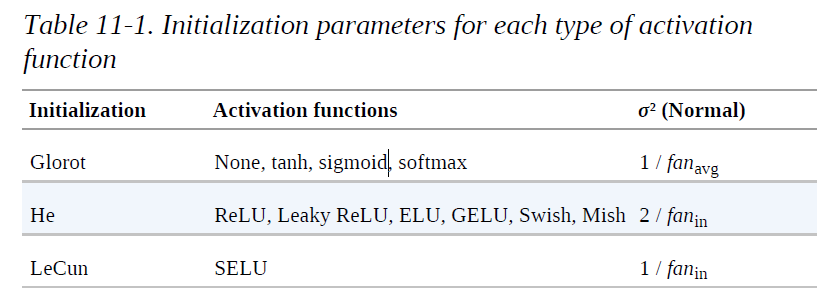

| Thuật ngữ    | Ý nghĩa                                                        |
| ------------ | -------------------------------------------------------------- |
| **fan\_in**  | Số lượng **đầu vào** (input units) đến một neuron hoặc một lớp |
| **fan\_out** | Số lượng **đầu ra** (output units) từ một neuron hoặc một lớp  |
| **fan\_avg** | Trung bình của `fan_in` và `fan_out`:                          |


In [2]:
a = [1, 2, 3, 4]
a[:-1]

[1, 2, 3]

## Faster Optimizer

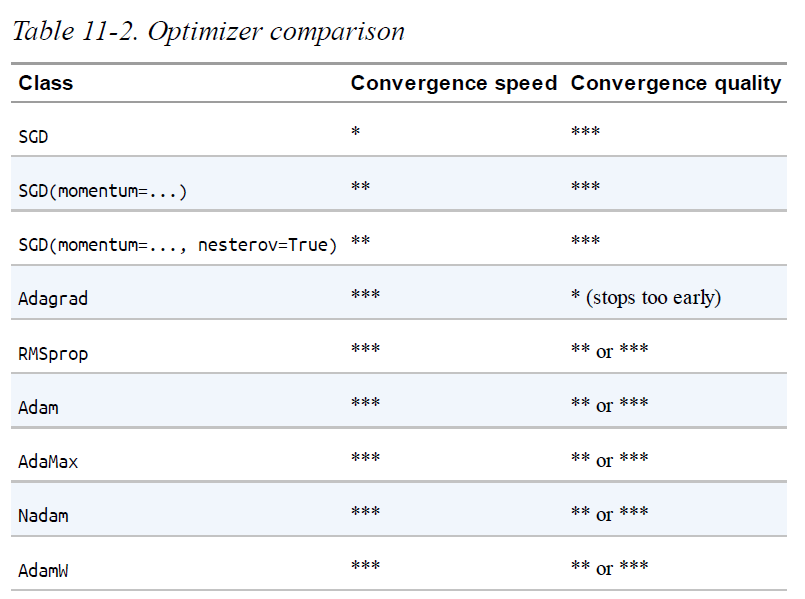

# Exercises

In [5]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(tf.keras.layers.Dense(
        100, activation="swish", kernel_initializer="he_normal"))

In [17]:
%load_ext tensorboard
%tensorboard --logdir=./my_cifar10_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 36504), started 0:36:06 ago. (Use '!kill 36504' to kill it.)

In [6]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [7]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [8]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train_full), (X_test, y_test) = cifar10

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170498071/170498071 [==============================] - 268s 2us/step


In [9]:
X_train.shape, X_test.shape

((45000, 32, 32, 3), (10000, 32, 32, 3))

In [11]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)

model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_model.keras", save_best_only=True)
run_index = 1
run_logdir = "/my_cifar10_logs/run_{run_index:03d}"
tensorboard = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb]


In [13]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/100


1407/1407 [==============================] - 12s 5ms/step - loss: 4.5307 - accuracy: 0.1395 - val_loss: 2.1723 - val_accuracy: 0.2066
Epoch 2/100
1407/1407 [==============================] - 7s 5ms/step - loss: 2.1079 - accuracy: 0.2295 - val_loss: 2.0259 - val_accuracy: 0.2566
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9860 - accuracy: 0.2698 - val_loss: 1.9634 - val_accuracy: 0.2740
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9047 - accuracy: 0.3000 - val_loss: 1.9244 - val_accuracy: 0.3216
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8422 - accuracy: 0.3277 - val_loss: 1.8643 - val_accuracy: 0.3258
Epoch 6/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7869 - accuracy: 0.3517 - val_loss: 1.7913 - val_accuracy: 0.3448
Epoch 7/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.7379 - accuracy: 0.3667 - val_loss: 1.7284 - val

In [14]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 1.5005 - accuracy: 0.4752


[1.5004770755767822, 0.47519999742507935]

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_model.keras", save_best_only=True)
run_index = 1
run_logdir = f"/my_cifar10_logs/run_bn_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100, validation_data=(
    X_valid, y_valid), callbacks=callbacks)

model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 22s 9ms/step - loss: 2.0534 - accuracy: 0.2467 - val_loss: 1.9339 - val_accuracy: 0.3084
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7881 - accuracy: 0.3556 - val_loss: 1.9172 - val_accuracy: 0.3158
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.6870 - accuracy: 0.3976 - val_loss: 1.7300 - val_accuracy: 0.3790
Epoch 4/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6227 - accuracy: 0.4205 - val_loss: 1.6710 - val_accuracy: 0.4000
Epoch 5/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5689 - accuracy: 0.4410 - val_loss: 1.6566 - val_accuracy: 0.4086
Epoch 6/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5182 - accuracy: 0.4597 - val_loss: 1.7261 - val_accuracy: 0.3952
Epoch 7/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4682 - accuracy: 0.4778 - val_loss: 1.8241 -

[1.4385124444961548, 0.5120000243186951]

In [23]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(
        100, kernel_initializer="lecun_normal", activation="selu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer, metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_selu_model.keras", save_best_only=True)

run_index = 1
run_logdir = f"/my_cifar10_logs/run_selu_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_valid_scaled, y_valid), callbacks=callbacks)

model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 11s 5ms/step - loss: 1.9417 - accuracy: 0.2963 - val_loss: 1.8193 - val_accuracy: 0.3214
Epoch 2/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7420 - accuracy: 0.3803 - val_loss: 1.7329 - val_accuracy: 0.3706
Epoch 3/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6543 - accuracy: 0.4141 - val_loss: 1.6755 - val_accuracy: 0.3954
Epoch 4/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5986 - accuracy: 0.4342 - val_loss: 1.6611 - val_accuracy: 0.4296
Epoch 5/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5405 - accuracy: 0.4592 - val_loss: 1.6308 - val_accuracy: 0.4260
Epoch 6/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5080 - accuracy: 0.4703 - val_loss: 1.5766 - val_accuracy: 0.4502
Epoch 7/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5519 - accuracy: 0.4525 - val_loss: 1.5956 - val_a

[1.4709707498550415, 0.4927999973297119]

In [26]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(
        100, kernel_initializer="lecun_normal", activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer, metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=20, restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_cifar10_alpha_dropout_model.keras", save_best_only=True)
run_index = 1
run_logdir = f"/my_cifar10_logs/run_alpha_dropout_{run_index:03d}"
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100, validation_data=(
    X_valid_scaled, y_valid), callbacks=callbacks)
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 11s 5ms/step - loss: 1.8894 - accuracy: 0.3285 - val_loss: 1.7329 - val_accuracy: 0.3808
Epoch 2/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6737 - accuracy: 0.4103 - val_loss: 1.6418 - val_accuracy: 0.4216
Epoch 3/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5877 - accuracy: 0.4441 - val_loss: 1.6238 - val_accuracy: 0.4272
Epoch 4/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.5240 - accuracy: 0.4657 - val_loss: 1.5742 - val_accuracy: 0.4590
Epoch 5/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4649 - accuracy: 0.4896 - val_loss: 1.5759 - val_accuracy: 0.4674
Epoch 6/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.4152 - accuracy: 0.5053 - val_loss: 1.5632 - val_accuracy: 0.4616
Epoch 7/100
1407/1407 [==============================] - 6s 4ms/step - loss: 1.3704 - accuracy: 0.5231 - val_loss: 1.5405 - val_a

[1.4458822011947632, 0.49880000948905945]

Let's use MC Dropout

In [27]:
class MCAlphaDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [28]:
mc_model = tf.keras.Sequential([
    (
        MCAlphaDropout(layer.rate)
        if isinstance(layer, tf.keras.layers.AlphaDropout)
        else layer
    )
    for layer in model.layers
])

In [29]:
import numpy as np

def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return Y_probas.argmax(axis=1)

In [30]:
tf.random.set_seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = (y_pred == y_valid[:,0]).mean()
accuracy

157/157 [==============================] - 0s 2ms/step


0.5006

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(
        100, kernel_initializer="lecun_normal", activation="selu"))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.SGD()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer, metrics=["accuracy"])

In [36]:
K = tf.keras.backend
import math

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []

    def on_epoch_begin(self, epoch, logs=None):
        self.sum_of_epoch_losses = 0

    def on_batch_end(self, batch, logs=None):
        mean_epoch_loss = logs["loss"]
        new_sum_of_epoch_losses = mean_epoch_loss * (batch + 1)
        batch_loss = new_sum_of_epoch_losses - self.sum_of_epoch_losses
        self.sum_of_epoch_losses = new_sum_of_epoch_losses
        lr = self.model.optimizer.learning_rate.numpy()
        self.rates.append(lr)
        self.losses.append(batch_loss)
        self.model.optimizer.learning_rate = lr * self.factor


def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=1e-4, max_rate=1):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = (max_rate / min_rate) ** (1/iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    model.optimizer.learning_rate = min_rate
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, callbacks=[exp_lr])
    model.optimizer.learning_rate = init_lr
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

In [32]:
import matplotlib.pyplot as plt

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses, "b")
    plt.gca().set_xscale('log')
    max_loss = losses[0] + min(losses)
    plt.hlines(min(losses), min(rates), max(rates), color="k")
    plt.axis([min(rates), max(rates), 0, max_loss])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    plt.grid()

352/352 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1764


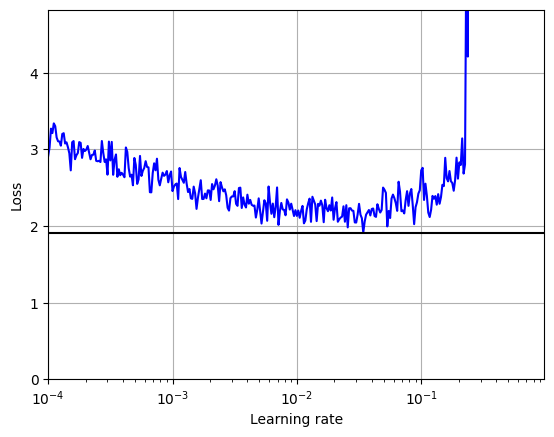

In [37]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1,
                                   batch_size=batch_size)
plot_lr_vs_loss(rates, losses)